### Plotting in Python using matplotlib.pyplot

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# For compatibility across multiple platforms
import os
IB = os.environ.get('INSTABASE_URI',None) is not None
open = ib.open if IB else open

In [3]:
# Read Cities.csv and Countries.csv into lists of dictionaries
cities = []
with open('Cities.csv','rU') as f:
    rows = csv.DictReader(f)
    for r in rows:
        cities.append(r)
countries = []
with open('Countries.csv','rU') as f:
    rows = csv.DictReader(f)
    for r in rows:
        countries.append(r)

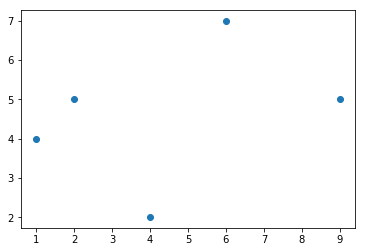

In [4]:
# Introduction to scatterplots
x = [1, 2, 4, 6, 9]
y = [4, 5, 2, 7, 5]
plt.scatter(x, y)
plt.show()

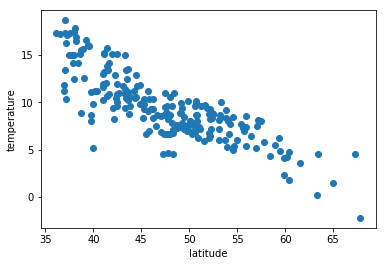

In [5]:
# Scatterplot of latitude (x) versus temperature (y)
x = []
y = []
for city in cities:
    x.append(city['latitude'])
    y.append(city['temperature'])
plt.xlabel('latitude')
plt.ylabel('temperature')
plt.scatter(x, y)
plt.show()

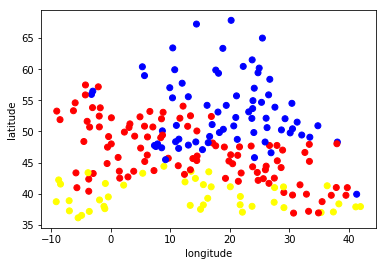

In [6]:
# Scatterplot of longitude (x) versus latitude (y) colored by temperature
x = []
y = []
colors = []
for city in cities:
    x.append(city['longitude'])
    y.append(city['latitude'])
    if float(city['temperature']) < 8:
        colors.append('blue')
    elif float(city['temperature']) < 12:
        colors.append('red')
    else: colors.append('yellow')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.scatter(x, y, c=colors)
plt.show()

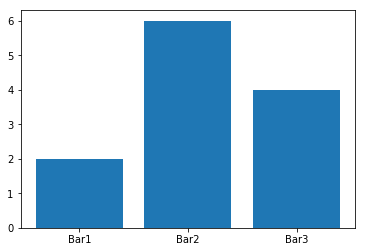

In [7]:
# Introduction to bar charts
bars = ['Bar1', 'Bar2', 'Bar3']
heights = [2, 6, 4]
plt.xticks([1,2,3], bars)
plt.bar([1,2,3], heights, align='center')
plt.show()

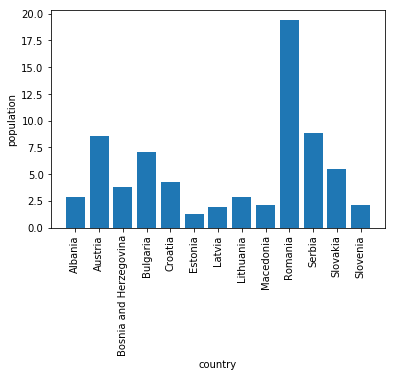

In [8]:
# Bar chart showing populations of countries with 'ia' in their name
bars = [] # countries with 'ia' in their name
heights = [] # population of those countries
for country in countries:
    if 'ia' in country['country']:
        bars.append(country['country'])
        heights.append(country['population'])
numbars = len(bars)
# range(numbars) in following command yields [0,1,...,numbars-1]
plt.xticks(range(numbars), bars, rotation='vertical')
plt.bar(range(numbars), heights, align='center')
plt.xlabel('country')
plt.ylabel('population')
plt.show()

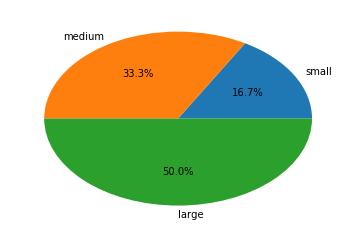

In [10]:
# Introduction to pie charts
sizes = [10, 20, 30]
lbls = ['small', 'medium', 'large']
plt.pie(sizes, labels=lbls, autopct='%1.1f%%')
plt.show()

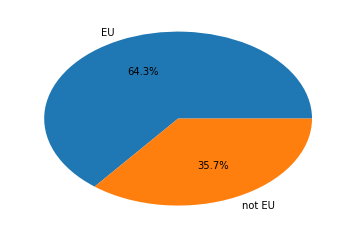

In [11]:
# Pie chart showing number of EU countries versus non-EU countries
numEU = 0
numNotEU = 0
for country in countries:
    if country['EU'] == 'yes':
        numEU += 1
    else:
        numNotEU +=1
sizes = [numEU, numNotEU]
lbls = ['EU', 'not EU']
plt.pie(sizes, labels=lbls, autopct='%1.1f%%')
plt.show()

### <font color="green">Your Turn: World Cup Data</font>

In [12]:
# Read Players.csv and Teams.csv into lists of dictionaries
players = []
with open('Players.csv','rU') as f:
    rows = csv.DictReader(f)
    for r in rows:
        players.append(r)
teams = []
with open('Teams.csv','rU') as f:
    rows = csv.DictReader(f)
    for r in rows:
        teams.append(r)

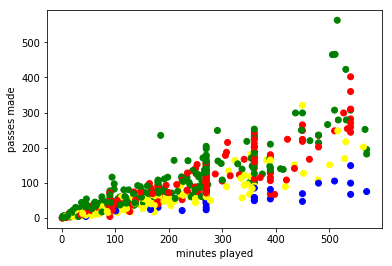

In [13]:
# Create a scatterplot of players showing minutes played (x-axis)
# versus passes made (y-axis). Color each player based on their
# position (goalkeeper, defender, midfielder, forward).
# Hint: remember copy-paste-modify approach to programming!
x = []
y = []
colors = []
for player in players:
    x.append(player['minutes'])
    y.append(player['passes'])
    if player['position'] == 'goalkeeper':
        colors.append('blue')
    elif player['position'] == 'defender':
        colors.append('red')
    elif player['position'] == 'midfielder':
        colors.append('green')
    else:
        colors.append('yellow')
plt.xlabel('minutes played')
plt.ylabel('passes made')
plt.scatter(x, y, c=colors)
plt.show()

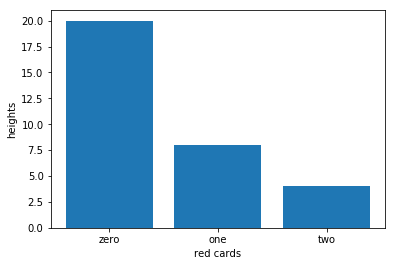

In [16]:
# Create a bar chart showing the number of teams with 0, 1, and 2 red cards.
# Reminder: redCards is a string, so convert or compare accordingly
bars = ['zero', 'one', 'two'] # number of red cards
heights = [0, 0, 0] # number of teams with zero/one/two red cards
# your code here
for team in teams:
    if team['redCards'] == '0':
        heights[0] += 1
    elif team['redCards'] == '1':
        heights[1] += 1
    elif team['redCards'] == '2':
        heights[2] += 1
# print(heights)
numbars = len(bars)
plt.xticks(range(numbars), bars)
plt.bar(range(numbars), heights, align='center')
plt.xlabel('red cards')
plt.ylabel('heights')
plt.show()

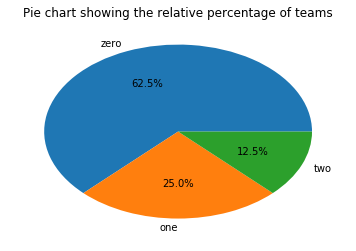

In [20]:
# Create a pie chart showing the relative percentage of teams
# with 0, 1, and 2 red cards.
# Reminder: redCards is a string, so convert or compare accordingly
plt.pie(heights, labels=bars, autopct='%1.1f%%')
plt.title("Pie chart showing the relative percentage of teams")
plt.show()

Enter the team name: Nigeria
[1, 6, 5, 6]


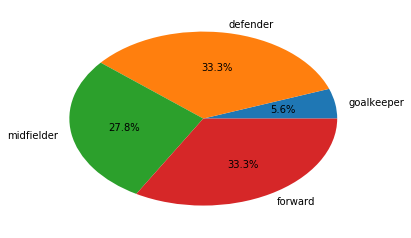

Enter the team name: France
[1, 6, 7, 5]


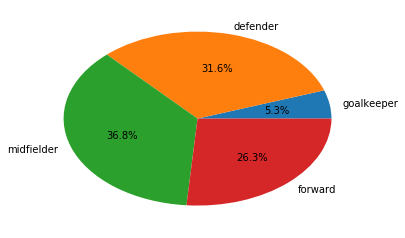

Enter the team name: Brazil
[1, 6, 8, 4]


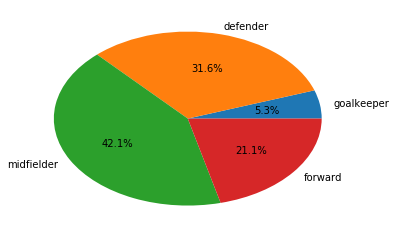

Enter the team name: Google
Team not in 2010 World Cup
Enter the team name: quit


In [33]:
# BONUS!
# Write a loop that interactively asks the user to enter a team name.
# If the team exists, create a pie chart showing how many players the team
# has in each of the four positions.
# If the team doesn't exist, print "Team not in 2010 World Cup".
# If 'quit' is entered, terminate the loop.
# Note: To read a string from the user instead of a number, use
# raw_input() instead of input()

team_name = "hi"
team_names = []
positions = ['goalkeeper', 'defender', 'midfielder', 'forward']
for team in teams:
    team_names.append(team['team'])

while team_name != "quit":
    team_name = raw_input("Enter the team name: ")
    for team in teams:
        colors = [0,0,0,0]
        if team_name == team['team']:
            for player in players:
                if player['team'] == team['team']:
                    if player['position'] == 'goalkeeper':
                        colors[0] += 1
                    elif player['position'] == 'defender':
                        colors[1] += 1
                    elif player['position'] == 'midfielder':
                        colors[2] += 1
                    else:
                        colors[3] += 1
            print(colors)            
            plt.pie(colors, labels=positions, autopct='%1.1f%%')
            plt.show()
    if team_name not in team_names and team_name != "quit":
        print "Team not in 2010 World Cup"
    